## <font color=blue> *Stats507  , WI 2019*</font>
### Zizhao Zhang
#### zizhaoz@umich.edu
***

Time spent on problems(hours):   *Problem 1*: 15 minutes , *Problem 2*: 4 hour *Problem 3*: 2 hour

Persons discussed idea about: Hongru Fang，Thomas Fiore

***
**REQUIRE MODULE:**

In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tempfile
from tensorflow.examples.tutorials.mnist import input_data
import warnings
warnings.filterwarnings("ignore")
import tensorflow_probability as tfp

### Problem 1: Warmup: Constructing a 3-tensor (1 point):
Create a TensorFlow constant tensor **tflogo** with shape 5-by-4-by-3. This tensor will
represent the 5-by-4-by-3 volume that contains the orange structure depicted in the logo
(said another way, the orange structure is inscribed in this 5-by-4-by-3 volume). 
***
Each cell of your tensor should correspond to one cell in this volume. Each entry of your tensor
should be 1 if and only if the corresponding cell is part of the orange structure, and should
be 0 otherwise.
***
Looking at the logo, we see that the orange structure can be broken into
11 cubic cells, so your tensor **tflogo** should have precisely 11 non-zero entries. For the
sake of consistency, the (0, 3, 2)-entry of your tensor (using 0-indexing) should correspond
to the top rear corner of the structure where the cross of the “T” meets the top of the
“F”. Note: if you look carefully, the shadows in the logo do not correctly reflect the
orange structure—the shadow of the “T” is incorrectly drawn. Do not let this fool you!
***
To clarify: I drew the below illustration
<a href="http://tinypic.com?ref=2lb3es" target="_blank"><img src="http://i67.tinypic.com/2lb3es.jpg" border="0" alt="Image and video hosting by TinyPic"></a>


In [42]:
###make sure version
tf.__version__

'1.13.1'

since tf.zeros doesn't support indexing assignment for the "ones", which are the orange blocks, I chose to use numpy to create the basic structure first for the ease, and then convert back to a tensor

create the tensor in five layers, starting from the "rear corner" labeled in the above image
at the index 0- from top to down. <font color = red>In that first layer should be a "L" shape, 2nd, 4th, 5th layer should be a one dot at (2,2)


In [43]:
#create 5 layers from top to down
layer1 = np.zeros([4,3])
#same reference
layer2 = layer4 = layer5 = np.zeros([4,3])
#layer4
layer3 = np.zeros([4,3])

In [44]:
layer1[3,2] = 1

In [45]:
print(layer1)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]


Now fill the layer1 to L shape

In [46]:
#fill the 3rd column and 4th row to all ones
layer1[:,2] = 1
layer1[3,:] = 1

2nd, 4th, 5th layer should be a one dot at (2,2), **note we only need to reference one of them**

In [47]:
layer2[2,2] = 1

assign layer3

In [48]:
layer3[2,2] = 1
layer3[2,1] = 1

stack them into a 5 * 4 * 3 dimension numpy array

In [49]:
tensor = np.stack((layer1, layer2, layer3, layer4, layer5))
print(tensor)

[[[0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]]


As the nparray looks right, make it a tensor now

In [50]:
tflogo = tf.constant(tensor, dtype = tf.float32)

In [51]:
print_sess = tf.Session()
#print the tensor to check it
print(tflogo.eval(session = print_sess))
print_sess.close()

[[[0. 0. 1.]
  [0. 0. 1.]
  [0. 0. 1.]
  [1. 1. 1.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 1. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]]


### Probelm 2: Building and training simple models (4 points):
In all cases, your answer should include placeholder variables x and ytrue , which will serve as the predictor (independent variable) and response (dependent variable), respectively. Please use **W** to denote a parameter that multiplies the
predictor, and b to denote a bias parameter (i.e., a parameter that is added).

#### 2.1: Logistic regression with a negative log-likelihood loss.

In this model, which
we discussed briefly in class, the binary variable Y is distributed as a Bernoulli
random variable with success parameter $$ \text {}
\sigma\left(W^{T} X+b\right), \text { where } \sigma(z)=(1+\exp (-z))^{-1}
\text {is the logistic function, and } 
X \in \mathbb{R}^{6} \text {is the predictor random variable, and } W \in \mathbb{R}^{6}, 
b \in \mathbb{R} \text { are the model parameters. Derive the log-likelihood of } Y 
$$


In [52]:
###we sure about the two place_holders
x = tf.placeholder(tf.float32, [None,6])
#set the dimension to 2 since binary
ytrue = tf.placeholder(tf.float32, [None, 1])#response
##and W is a dimensinoal vars used for mult
W = tf.Variable(tf.ones([6,1]), dtype = tf.float32)
#bias 
b = tf.Variable(tf.zeros(1), dtype = tf.float32)
#define z = w^t*x+b
z = tf.matmul(x,W) + b

$$\text {Note: }z = W^{T} X+b, 
\operatorname{Pr}(Y=1 |  X,w) = \sigma\left(W^{T} X+b\right),
and  
 \operatorname{Pr}(Y=0 |  X,w) = 1-\sigma\left(W^{T} X+b\right) = \sigma(-z)=(1+\exp (z))^{-1}
 , \text{then we have the negative loss } =
 -1/m*(\sum_{i=1}^{m}\left[y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right])
$$

In [53]:
#then define probability of the bernoulli as h
h = 1.0/(1.0 + tf.exp(-z))
#define negative log-likelihood loss/cross entropy
loss = -1.0*tf.reduce_mean((ytrue * tf.log(h)) + (1-ytrue)*tf.log(1-h))

***
#### 2.2 Estimating parameters in logistic regression.

    • logistic_xtest.npy : contains a 500-by-6 matrix 
    • logistic_xtrain.npy : contains a 2000-by-6 matrix 
    • logistic_ytest.npy : contains a binary 500-dimensional vector 
    • logistic_ytrain.npy : contains a binary 2000-dimensional vector 

In [54]:
#load the npy files
xtrain = np.load("./logistic_xtrain.npy")
xtest = np.load("./logistic_xtest.npy")
ytrain = np.load("./logistic_ytrain.npy")
ytest = np.load("./logistic_ytest.npy")

Load the training data and use it to obtain estimates of W and b by minimizing
the negative log-likelihood via gradient descent. Another note: you’ll have to play
around with the learning rate and the number of steps. Two good ways to check if
optimization is finding a good minimizer:
    
    • Try printing the training data loss before and after optimization.

    • Use the test data to validate your estimated parameters.

In [55]:
#check shapes
xtrain.shape, ytrain.shape

((2000, 6), (2000, 1))

In [56]:
#Initialize the variables and assign their default value
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [57]:
#set up gradient descent optimizer with learning rate
train_optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(loss)

num_iters = 10000
#list for plotting and storing cost
cost = np.zeros(num_iters)
#accuracy_list = np.zeros(num_iters)
#sess.run(init)
for i in range(num_iters):
    #store the cost/loss
    cost[i] = sess.run(loss, {x: xtrain,
                                    ytrue: ytrain})
    sess.run(train_optimizer, {x:xtrain, ytrue:ytrain})
print("The estimated W is %s and b is %.5f"% (sess.run([W,b])[0],sess.run([W,b])[1]))
print("Mean of the loss of %d iterations renders as %.5f"%(num_iters, np.mean(cost)))

The estimated W is [[0.95293915]
 [1.2035762 ]
 [1.4516773 ]
 [2.9309719 ]
 [4.5173965 ]
 [7.3281064 ]] and b is -0.93471
Mean of the loss of 10000 iterations renders as 0.35209


Plot the iteration and the losses

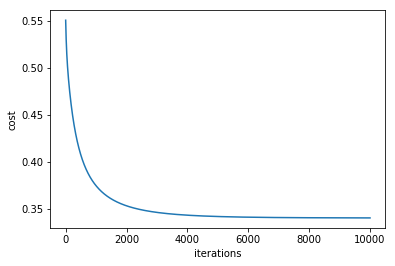

In [58]:
plt.plot(cost)
#plt.axis([0,num_iters,0,np.max(cost)])
plt.xlabel("iterations")
plt.ylabel("cost")
_ = plt.show()

#### 2.3: Evaluating logistic regression on test data.
Load the test data. What is the
negative log-likelihood of your model on this test data? That is, what is the negative
log-likelihood when you use your estimated parameters with the previously unseen
test data?

In [59]:
###test datas are already loaded
#check shapes
xtest.shape, ytest.shape

((500, 6), (500, 1))

Accuracy is also calculated

In [60]:
threshold = 0.5
correct_prediction = tf.cast(tf.greater(h, threshold), tf.float32)
accuracy = tf.reduce_mean(tf.to_float(tf.equal(ytrue, correct_prediction)))
print("The estimated W is %s and b is %.5f"% (W.eval(session = sess),sess.run(b)))
print("Negative likelihood on the test set is  %.5f"% sess.run(loss, {x:xtest, ytrue: ytest}))
#optional
print("The test accuracy is %f"% sess.run(accuracy, {x:xtest, ytrue: ytest}))

The estimated W is [[0.95293915]
 [1.2035762 ]
 [1.4516773 ]
 [2.9309719 ]
 [4.5173965 ]
 [7.3281064 ]] and b is -0.93471
Negative likelihood on the test set is  0.32706
The test accuracy is 0.858000


#### 2.4: Evaluating the estimated logistic parameters.
The data was, in reality, generated with:

$$W=(1,1,2,3,5,8), \quad b=-1$$
Write TensorFlow expressions to compute the squared error between your estimated
parameters and their true values. Evaluate the error in recovering W and b separately. What are the squared errors? **Note:** you need only evaluate the error of
your final estimates, not at every step.

In [61]:
###contruct new Ws and b 
#make sure W is 6*1
W_true = tf.constant(np.array([[1], [1], [2], [3], [5], [8]]), dtype=tf.float32)
b_true = tf.constant(-1,  dtype=tf.float32)

In [62]:
#init_true = tf.variables_initializer((W_true,b_true)).run(session = sess)
#run session
#sess.run(init_true)
#cannot initialize globally or else W value changes
#tf.global_variables_initializer().run(session = sess)
'''calculate square_error'''
Wsqerr = tf.reduce_sum(tf.square(sess.run([W,b])[0] - W_true))
bsqerr = tf.reduce_sum(tf.square(sess.run([W,b])[1] - b_true))
print("Squared error of W is %f and Squared error of b is %f" % \
      (Wsqerr.eval(session = sess), bsqerr.eval(session = sess)))

Squared error of W is 1.033428 and Squared error of b is 0.004262


#### 2.5: 
For ease of grading, please make the variables from the above problems available
in a dictionary called **results_logistic**. The dictionary should have keys **’W’**,
**’Wsqerr’**, **’b’**, **’bsqerr’**, **’log_lik_test’** , with respective values sess.run(x)
where x ranges over the corresponding quantities. For example, if my squared error
for W is stored in a TF variable called W_squared_error, then the key ’Wsqerr’
should have value sess.run(W_squared_error).

In [63]:
results_logistic = {"W": sess.run(W),
                    "Wsqerr": sess.run(Wsqerr),
                    "b": sess.run(b),
                    "bsqerr": sess.run(bsqerr),
                    "log_lik_test": sess.run(loss, {x:xtest, ytrue: ytest})}

In [64]:
print(results_logistic)

{'W': array([[0.95293915],
       [1.2035762 ],
       [1.4516773 ],
       [2.9309719 ],
       [4.5173965 ],
       [7.3281064 ]], dtype=float32), 'Wsqerr': 1.0334278, 'b': array([-0.9347123], dtype=float32), 'bsqerr': 0.004262485, 'log_lik_test': 0.327055}


#### 2.6: Classification of normally distributed data. 
\begin{array}{l}{K=3 \text { different classes. Each class } k \in\{1,2,3\} \text { has an associated mean } \mu_{k} \in R \text { and }} \\ {\text { variance } \sigma_{k}^{2} \in \mathbb{R}, \text { and all observations from a given class are i.i.d. } \mathcal{N}\left(\mu_{k}, \sigma_{k}^{2}\right) . \text { The }} \\ {\text { four files are: }}\end{array}

In [65]:
#load the data
normal_xtest = np.load("./normal_xtest.npy")
normal_xtrain = np.load("./normal_xtrain.npy")
#labels
normal_ytrain = np.load("./normal_ytrain.npy")
normal_ytest = np.load("./normal_ytest.npy")

In [66]:
#verify shapes
normal_xtest.shape, normal_xtrain.shape, normal_ytrain.shape, normal_ytest.shape

((500, 1), (2000, 1), (2000, 3), (500, 3))

In [67]:
import warnings
warnings.filterwarnings("ignore")
####set ups
K = 3
mu = tf.Variable(tf.ones([1,K]), dtype = tf.float32)
#note this is var-sigma squared
sigma_2 = tf.Variable(tf.ones([1,K]), dtype = tf.float32)
##ytrue and x
x = tf.placeholder(tf.float32, [None, 1])
ytrue = tf.placeholder( tf.float32, [None, 3])
#normal distribution
normal_dis =  tfp.distributions.Normal(loc=mu, scale=tf.sqrt(sigma_2)).prob(x)
#define cross-entropy
cross_entropy = -1.0 * tf.reduce_mean(tf.reduce_sum(ytrue * tf.log(normal_dis)))
# Optimize via stochastic gradient descent
train_step = tf.train.AdagradOptimizer(0.05).minimize(cross_entropy)

In [68]:
###take 10000 steps as always,
num_iters = 10000
# Start up a session.
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
#sess.run(init)
cost = np.zeros(num_iters)
for i in range(num_iters):
    sess.run(train_step, feed_dict={x: normal_xtrain, ytrue: normal_ytrain})
    cost[i] = sess.run(cross_entropy, {x: normal_xtest, ytrue: normal_ytest})
print("By training, means're predicated as %s \n and the variances're predicated as %s "%
      (sess.run([mu, sigma_2])[0][0],sess.run([mu, sigma_2])[1][0] ))

By training, means're predicated as [-1.0076301   0.00449134  3.004821  ] 
 and the variances're predicated as [0.53338194 1.0087556  1.515918  ] 


#### 2.7: Evaluating loss on test data
Load the test data. What is the cross-entropy of
your model on this test data? That is, what is the cross-entropy when you use your
estimated parameters with the previously unseen test data?

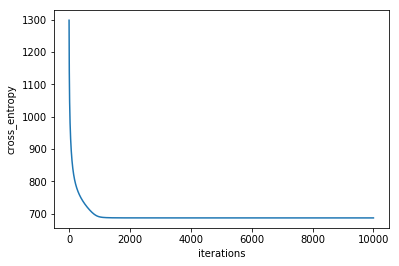

In [69]:
plt.plot(cost)
#plt.axis([0,num_iters,0,np.max(cost)])
plt.xlabel("iterations")
plt.ylabel("cross_entropy")
_ = plt.show()

In [70]:
print("cross-entropy is %f "%sess.run(cross_entropy, {x: normal_xtest, ytrue: normal_ytest}))

cross-entropy is 686.346802 


#### 2.8: Evaluating parameter estimation on test data.
The true parameter values for the three classes were $$
\begin{aligned} \mu_{0} &=-1, \sigma_{0}^{2}=0.5 \\ \mu_{1} &=0, \sigma_{1}^{2}=1 \\ \mu_{2} &=3, \sigma_{2}^{2}=1.5 \end{aligned}
$$
Write a TensorFlow expression to compute the total squared error (i.e., summed
over the six parameters) 

In [71]:
mu_true = tf.constant([[-1, 0, 3]], dtype = tf.float32)
sigma_true = tf.constant([[0.5, 1, 1.5]], dtype = tf.float32)
#squared error
class_error = tf.reduce_sum(tf.square(mu - mu_true)) + \
              tf.reduce_sum(tf.square(sigma_2 - sigma_true))
print("Squared error is %f "%sess.run(class_error))

Squared error is 0.001546 


#### 2.9: Evaluating classification error on test data. 
Write and evaluate a TensorFlow
expression that computes the classification error of your estimated model averaged
over the test data.

In [72]:
correct_prediction = tf.equal(tf.argmax(normal_dis, 1), tf.argmax(ytrue, 1))
error_rate = 1 - tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("error rate is %f "%sess.run(error_rate, {x:normal_xtest, ytrue: normal_ytest}))

error rate is 0.268000 


#### 2.10: 
 Again, for ease of grading, define a dictionary called results_class, with keys
’mu’, ’sigma2’, ’crossent_test’, ’class_error’ with keys corresponding to
the evaluation (again using sess.run) of your estimate of $$\mu, \sigma^2$$
, the cross-entropy
on the test set, and the classification error from the previous problem

In [73]:
results_class = {"mu" : sess.run([mu, sigma_2])[0][0],
                 "sigma2" : sess.run([mu, sigma_2])[1][0],
                 "crossent_test" : sess.run(cross_entropy, {x: normal_xtest,
                                                             ytrue: normal_ytest}),
                 "class_error" : sess.run(error_rate, {x:normal_xtest, ytrue: normal_ytest})}
print(results_class)

{'mu': array([-1.0076301 ,  0.00449134,  3.004821  ], dtype=float32), 'sigma2': array([0.53338194, 1.0087556 , 1.515918  ], dtype=float32), 'crossent_test': 686.3468, 'class_error': 0.268}


### Problem 3: Building a Complicated Model (1 point)
I chose to follow along: https://www.tensorflow.org/tutorials/estimators/boosted_trees
under the ML at production scale
***
Details please follow tutorial.ipynb

#### Problem 4: 

#### 4.1 :
follow the mnist page:https://cloud.google.com/ml-engine/docs/tensorflow/distributed-tensorflow-mnist-cloud-datalab

result is shown as below as the prediction is based on the figure drawn
<a href="http://tinypic.com?ref=3449x15" target="_blank"><img src="http://i68.tinypic.com/3449x15.png" border="0" alt="Image and video hosting by TinyPic"></a>

#### 4.2:
Let us return to the classifier that you trained above on the normally-distributed
data. In this and the next several subproblems, we will take an adaptation of that
model and upload it to GCP where it will serve as a prediction node similar to the one
you built in the tutorial above. Train the same classifier on the same training data,
but this time, save the resulting trained model in a directory called normal_trained.
You’ll want to use the tf.saved_model.simple_save function. Refer to the GCP documentation at
https://cloud.google.com/ml-engine/docs/deploying-models,
and the documentation on the tf.saved_model.simple_save function, here: https:
//www.tensorflow.org/programmers_guide/saved_model#save_and_restore_models
Please include a copy of this model directory in your submission. Hint: a stumbling
block in this problem is figuring out what to supply as the inputs and outputs arguments to the simple_save function. Your arguments should look something like
inputs = {’x’:x}, outputs = {’prediction’:prediction}.

In [74]:
import os
if not os.path.exists("normal_trained"):
    tf.saved_model.simple_save(sess, "normal_trained", inputs = {"x":x}, 
                           outputs = {"prediction": normal_dis})

#### 4.4:

Model version created as below 
<a href="http://tinypic.com?ref=258wdjd" target="_blank"><img src="http://i67.tinypic.com/258wdjd.png" border="0" alt="Image and video hosting by TinyPic"></a>

#### 4.5: 
commands and screenshots are listed below

#### 4.6:
commands and screenshots of shell:
<a href="http://tinypic.com?ref=264osye" target="_blank"><img src="http://i65.tinypic.com/264osye.png" border="0" alt="Image and video hosting by TinyPic"></a>

##### note the class is from the third class, which is class 2 due to zero based index